In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql


In [2]:
# Load the general dataset

HOutliers = pd.read_csv(r"C:\Users\gchai\Downloads\Height-01.csv", header=0)
HOutliers.head()


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
# Display the dataset information

HOutliers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [4]:
# Display the shape of the dataset

HOutliers.shape


(10000, 2)

In [5]:
# Display "Descriptive Statistical Analysis"

HOutliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.36756,3.847528,54.263133,63.50562,66.31807,69.174262,78.998742


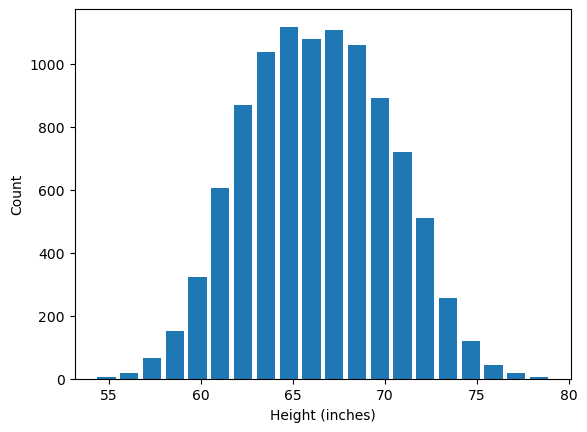

In [6]:
# Plot Histogram

plt.hist(HOutliers.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

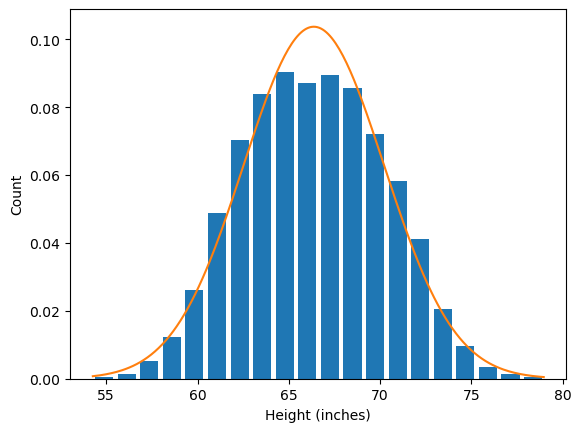

In [7]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(HOutliers.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(HOutliers.Height.min(), HOutliers.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, HOutliers.Height.mean(),HOutliers.Height.std()))


In [8]:
# Calculate the standard deviation

HOutliers.Height.std()
#HOutliers['Height'].std()


3.847528120795573

In [9]:
# Calculat upper limit as  "Upper Limit = mean + 3 * std"

upper_limit = round(HOutliers.Height.mean() + 3 * HOutliers.Height.std(),3)
upper_limit

77.91

In [10]:
# Calculat Lower limit as "Lower Limit = mean - 3 * std" 

lower_limit = round(HOutliers.Height.mean() - 3 * HOutliers.Height.std(), 3)
lower_limit


54.825

In [11]:
print(HOutliers.Height.min())
print(HOutliers.Height.max())


54.26313333
78.99874235


In [12]:
# Display the outlier in the dataset

HOutliers[(HOutliers.Height > upper_limit) | (HOutliers.Height < lower_limit)]


,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [13]:
# Eliminate the outlier and write data to new file

HOutliers_new = HOutliers[(HOutliers.Height > lower_limit) & (HOutliers.Height < upper_limit)]
HOutliers_new.head()


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [14]:
HOutliers_new.shape


(9993, 2)

In [15]:
HOutliers.shape[0] - HOutliers_new.shape[0]


7

In [16]:
# Outlier detection and remove by using Z score (-3 to +3)
# Z score indicate how many standard deviation away a data point is
# Calculate the Z score = (X - m)/Sigma, where m = mean, Sigma = standard deviation

HOutliers['ZScore'] = (HOutliers.Height - HOutliers.Height.mean()) / HOutliers.Height.std()
HOutliers_new2 = HOutliers[(HOutliers.ZScore>-3) & (HOutliers.ZScore<3)]
HOutliers.shape[0] - HOutliers_new2.shape[0]


7

In [17]:
HOutliers_new2_O = HOutliers[(HOutliers.ZScore<-3) | (HOutliers.ZScore>3)]
HOutliers_new2_O


,Gender,Height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


<Axes: xlabel='Height'>

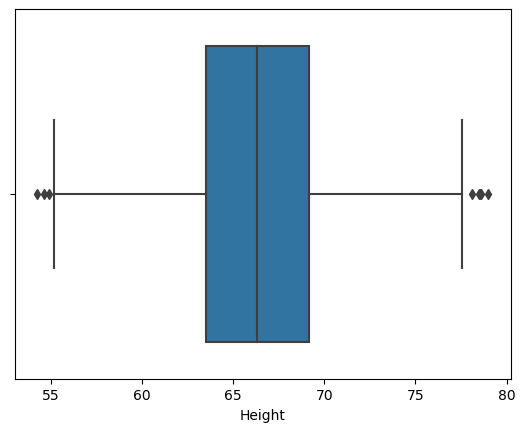

In [19]:
# Display the box plot to show the outliers

import seaborn as sns

sns.boxplot(x=HOutliers["Height"])


In [20]:
# Calculating the Q1, Q3 and Inter Quartile Range (IQR) 

first_quantile = HOutliers["Height"].quantile(.25)
third_quantile = HOutliers["Height"].quantile(.75)
IQR = third_quantile - first_quantile


In [21]:
# Calculate the Upper bound

Upper_bound = round(third_quantile + 1.5 * IQR, 3)
Upper_bound


77.677

In [22]:
Lower_bound = round(first_quantile - 1.5 * IQR, 3)
Lower_bound
#------------

55.003

In [23]:
# Display outliers                                                             

HOutliers[(HOutliers.Height < Lower_bound) | (HOutliers.Height > Upper_bound)]
#-------------------------------------------------------------------------------------------------------------------------------------
# Eliminate outliers

HOutliers_new4 = HOutliers[(HOutliers.Height>Lower_bound) & (HOutliers.Height<Upper_bound)]
HOutliers_new4


,Gender,Height,ZScore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
